In [1]:
import os
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
import numpy as np
from d2l import torch as d2l
from IPython import display

In [2]:
# 从CSV文件中读取数据
data_file = "./Data/all_records_g18.csv"
data = pd.read_csv(data_file)
label_Original_SpeedData = data["Original_SpeedData"]
label_Original_TorqueData = data["Original_TorqueData"]
label_Original_AngleData = data["Original_AngleData"]

In [3]:
# 标签值数值化
encoder = LabelEncoder()
label_encoded = encoder.fit_transform(data["File_Name"])
label = pd.DataFrame({"label": [label_encoded[i] for i in range(len(label_encoded))]},
                        columns=["label"])

In [21]:
def get_label(y):
    return list(encoder.inverse_transform(y))

In [4]:
# 将Original_SpeedData等数据转化为列表形式，方便之后的操作
def extract(original):
    data_after_extract = []
    min_len = 0
    for i in range(len(original)):
        lst = original[i].split(sep=',')
        lst[0] = lst[0][1::]
        lst.pop()
        if min_len > len(lst) or min_len == 0:
            min_len = len(lst)
        data_after_extract.append(lst)
    for i in range(len(data_after_extract)):
        data_after_extract[i] = data_after_extract[i][:min_len:]
        for j in range(len(data_after_extract[i])):
            data_after_extract[i][j] = int(data_after_extract[i][j])
    return data_after_extract

Original_SpeedData = extract(label_Original_SpeedData)
Original_TorqueData = extract(label_Original_TorqueData)
Original_AngleData = extract(label_Original_AngleData)

In [5]:
Original_SpeedData_df = pd.DataFrame({"Original_SpeedData0": [Original_SpeedData[i][0] for i in range(len(Original_SpeedData))],
                                      "Original_SpeedData1": [Original_SpeedData[i][1] for i in range(len(Original_SpeedData))],
                                      "Original_SpeedData2": [Original_SpeedData[i][2] for i in range(len(Original_SpeedData))],
                                      "Original_SpeedData3": [Original_SpeedData[i][3] for i in range(len(Original_SpeedData))],
                                      "Original_SpeedData4": [Original_SpeedData[i][4] for i in range(len(Original_SpeedData))],
                                      "Original_SpeedData5": [Original_SpeedData[i][5] for i in range(len(Original_SpeedData))],
                                      "Original_SpeedData6": [Original_SpeedData[i][6] for i in range(len(Original_SpeedData))],
                                      "Original_SpeedData7": [Original_SpeedData[i][7] for i in range(len(Original_SpeedData))],
                                      "Original_SpeedData8": [Original_SpeedData[i][8] for i in range(len(Original_SpeedData))],
                                      "Original_SpeedData9": [Original_SpeedData[i][9] for i in range(len(Original_SpeedData))],
                                      "Original_SpeedData10": [Original_SpeedData[i][10] for i in range(len(Original_SpeedData))],
                                      "Original_SpeedData11": [Original_SpeedData[i][11] for i in range(len(Original_SpeedData))],
                                      "Original_SpeedData12": [Original_SpeedData[i][12] for i in range(len(Original_SpeedData))],
                                      "Original_SpeedData13": [Original_SpeedData[i][13] for i in range(len(Original_SpeedData))],
                                      "Original_SpeedData14": [Original_SpeedData[i][14] for i in range(len(Original_SpeedData))],
                                      "Original_SpeedData15": [Original_SpeedData[i][15] for i in range(len(Original_SpeedData))],
                                      "Original_SpeedData16": [Original_SpeedData[i][16] for i in range(len(Original_SpeedData))],
                                      "Original_SpeedData17": [Original_SpeedData[i][17] for i in range(len(Original_SpeedData))],
                                      "Original_SpeedData18": [Original_SpeedData[i][18] for i in range(len(Original_SpeedData))],
                                      "Original_SpeedData19": [Original_SpeedData[i][19] for i in range(len(Original_SpeedData))],
                                      "Original_SpeedData20": [Original_SpeedData[i][20] for i in range(len(Original_SpeedData))],
                                      "Original_SpeedData21": [Original_SpeedData[i][21] for i in range(len(Original_SpeedData))],
                                      "Original_SpeedData22": [Original_SpeedData[i][22] for i in range(len(Original_SpeedData))],
                                      "Original_SpeedData23": [Original_SpeedData[i][23] for i in range(len(Original_SpeedData))],
                                      "Original_SpeedData24": [Original_SpeedData[i][24] for i in range(len(Original_SpeedData))],
                                      "Original_SpeedData25": [Original_SpeedData[i][25] for i in range(len(Original_SpeedData))],
                                      "Original_SpeedData26": [Original_SpeedData[i][26] for i in range(len(Original_SpeedData))],
                                      "Original_SpeedData27": [Original_SpeedData[i][27] for i in range(len(Original_SpeedData))],
                                      "Original_SpeedData28": [Original_SpeedData[i][28] for i in range(len(Original_SpeedData))],
                                      "Original_SpeedData29": [Original_SpeedData[i][29] for i in range(len(Original_SpeedData))],
                                      "Original_SpeedData30": [Original_SpeedData[i][30] for i in range(len(Original_SpeedData))],
                                      "Original_SpeedData31": [Original_SpeedData[i][31] for i in range(len(Original_SpeedData))],
                                      "Original_SpeedData32": [Original_SpeedData[i][32] for i in range(len(Original_SpeedData))]},
                           columns=["Original_SpeedData0", "Original_SpeedData1", "Original_SpeedData2", "Original_SpeedData3", "Original_SpeedData4", "Original_SpeedData5",
                                      "Original_SpeedData6", "Original_SpeedData7", "Original_SpeedData8", "Original_SpeedData9", "Original_SpeedData10", "Original_SpeedData11",
                                      "Original_SpeedData12", "Original_SpeedData13", "Original_SpeedData14", "Original_SpeedData15", "Original_SpeedData16", "Original_SpeedData17",
                                      "Original_SpeedData18", "Original_SpeedData19", "Original_SpeedData20", "Original_SpeedData21", "Original_SpeedData22", "Original_SpeedData23",
                                      "Original_SpeedData24", "Original_SpeedData25", "Original_SpeedData26", "Original_SpeedData27", "Original_SpeedData28", "Original_SpeedData29",
                                      "Original_SpeedData30", "Original_SpeedData31", "Original_SpeedData32"])
Original_TorqueData_df = pd.DataFrame({"Original_TorqueData0": [Original_TorqueData[i][0] for i in range(len(Original_TorqueData))],
                                      "Original_TorqueData1": [Original_TorqueData[i][1] for i in range(len(Original_TorqueData))],
                                      "Original_TorqueData2": [Original_TorqueData[i][2] for i in range(len(Original_TorqueData))],
                                      "Original_TorqueData3": [Original_TorqueData[i][3] for i in range(len(Original_TorqueData))],
                                      "Original_TorqueData4": [Original_TorqueData[i][4] for i in range(len(Original_TorqueData))],
                                      "Original_TorqueData5": [Original_TorqueData[i][5] for i in range(len(Original_TorqueData))],
                                      "Original_TorqueData6": [Original_TorqueData[i][6] for i in range(len(Original_TorqueData))],
                                      "Original_TorqueData7": [Original_TorqueData[i][7] for i in range(len(Original_TorqueData))],
                                      "Original_TorqueData8": [Original_TorqueData[i][8] for i in range(len(Original_TorqueData))],
                                      "Original_TorqueData9": [Original_TorqueData[i][9] for i in range(len(Original_TorqueData))],
                                      "Original_TorqueData10": [Original_TorqueData[i][10] for i in range(len(Original_TorqueData))],
                                      "Original_TorqueData11": [Original_TorqueData[i][11] for i in range(len(Original_TorqueData))],
                                      "Original_TorqueData12": [Original_TorqueData[i][12] for i in range(len(Original_TorqueData))],
                                      "Original_TorqueData13": [Original_TorqueData[i][13] for i in range(len(Original_TorqueData))],
                                      "Original_TorqueData14": [Original_TorqueData[i][14] for i in range(len(Original_TorqueData))],
                                      "Original_TorqueData15": [Original_TorqueData[i][15] for i in range(len(Original_TorqueData))],
                                      "Original_TorqueData16": [Original_TorqueData[i][16] for i in range(len(Original_TorqueData))],
                                      "Original_TorqueData17": [Original_TorqueData[i][17] for i in range(len(Original_TorqueData))],
                                      "Original_TorqueData18": [Original_TorqueData[i][18] for i in range(len(Original_TorqueData))],
                                      "Original_TorqueData19": [Original_TorqueData[i][19] for i in range(len(Original_TorqueData))],
                                      "Original_TorqueData20": [Original_TorqueData[i][20] for i in range(len(Original_TorqueData))],
                                      "Original_TorqueData21": [Original_TorqueData[i][21] for i in range(len(Original_TorqueData))],
                                      "Original_TorqueData22": [Original_TorqueData[i][22] for i in range(len(Original_TorqueData))],
                                      "Original_TorqueData23": [Original_TorqueData[i][23] for i in range(len(Original_TorqueData))],
                                      "Original_TorqueData24": [Original_TorqueData[i][24] for i in range(len(Original_TorqueData))],
                                      "Original_TorqueData25": [Original_TorqueData[i][25] for i in range(len(Original_TorqueData))],
                                      "Original_TorqueData26": [Original_TorqueData[i][26] for i in range(len(Original_TorqueData))],
                                      "Original_TorqueData27": [Original_TorqueData[i][27] for i in range(len(Original_TorqueData))],
                                      "Original_TorqueData28": [Original_TorqueData[i][28] for i in range(len(Original_TorqueData))],
                                      "Original_TorqueData29": [Original_TorqueData[i][29] for i in range(len(Original_TorqueData))],
                                      "Original_TorqueData30": [Original_TorqueData[i][30] for i in range(len(Original_TorqueData))],
                                      "Original_TorqueData31": [Original_TorqueData[i][31] for i in range(len(Original_TorqueData))],
                                      "Original_TorqueData32": [Original_TorqueData[i][32] for i in range(len(Original_TorqueData))]},
                           columns=["Original_TorqueData0", "Original_TorqueData1", "Original_TorqueData2", "Original_TorqueData3", "Original_TorqueData4", "Original_TorqueData5",
                                      "Original_TorqueData6", "Original_TorqueData7", "Original_TorqueData8", "Original_TorqueData9", "Original_TorqueData10", "Original_TorqueData11",
                                      "Original_TorqueData12", "Original_TorqueData13", "Original_TorqueData14", "Original_TorqueData15", "Original_TorqueData16", "Original_TorqueData17",
                                      "Original_TorqueData18", "Original_TorqueData19", "Original_TorqueData20", "Original_TorqueData21", "Original_TorqueData22", "Original_TorqueData23",
                                      "Original_TorqueData24", "Original_TorqueData25", "Original_TorqueData26", "Original_TorqueData27", "Original_TorqueData28", "Original_TorqueData29",
                                      "Original_TorqueData30", "Original_TorqueData31","Original_TorqueData32"])
Original_AngleData_df = pd.DataFrame({"Original_AngleData0": [Original_AngleData[i][0] for i in range(len(Original_AngleData))],
                                      "Original_AngleData1": [Original_AngleData[i][1] for i in range(len(Original_AngleData))],
                                      "Original_AngleData2": [Original_AngleData[i][2] for i in range(len(Original_AngleData))],
                                      "Original_AngleData3": [Original_AngleData[i][3] for i in range(len(Original_AngleData))],
                                      "Original_AngleData4": [Original_AngleData[i][4] for i in range(len(Original_AngleData))],
                                      "Original_AngleData5": [Original_AngleData[i][5] for i in range(len(Original_AngleData))],
                                      "Original_AngleData6": [Original_AngleData[i][6] for i in range(len(Original_AngleData))],
                                      "Original_AngleData7": [Original_AngleData[i][7] for i in range(len(Original_AngleData))],
                                      "Original_AngleData8": [Original_AngleData[i][8] for i in range(len(Original_AngleData))],
                                      "Original_AngleData9": [Original_AngleData[i][9] for i in range(len(Original_AngleData))],
                                      "Original_AngleData10": [Original_AngleData[i][10] for i in range(len(Original_AngleData))],
                                      "Original_AngleData11": [Original_AngleData[i][11] for i in range(len(Original_AngleData))],
                                      "Original_AngleData12": [Original_AngleData[i][12] for i in range(len(Original_AngleData))],
                                      "Original_AngleData13": [Original_AngleData[i][13] for i in range(len(Original_AngleData))],
                                      "Original_AngleData14": [Original_AngleData[i][14] for i in range(len(Original_AngleData))],
                                      "Original_AngleData15": [Original_AngleData[i][15] for i in range(len(Original_AngleData))],
                                      "Original_AngleData16": [Original_AngleData[i][16] for i in range(len(Original_AngleData))],
                                      "Original_AngleData17": [Original_AngleData[i][17] for i in range(len(Original_AngleData))],
                                      "Original_AngleData18": [Original_AngleData[i][18] for i in range(len(Original_AngleData))],
                                      "Original_AngleData19": [Original_AngleData[i][19] for i in range(len(Original_AngleData))],
                                      "Original_AngleData20": [Original_AngleData[i][20] for i in range(len(Original_AngleData))],
                                      "Original_AngleData21": [Original_AngleData[i][21] for i in range(len(Original_AngleData))],
                                      "Original_AngleData22": [Original_AngleData[i][22] for i in range(len(Original_AngleData))],
                                      "Original_AngleData23": [Original_AngleData[i][23] for i in range(len(Original_AngleData))],
                                      "Original_AngleData24": [Original_AngleData[i][24] for i in range(len(Original_AngleData))],
                                      "Original_AngleData25": [Original_AngleData[i][25] for i in range(len(Original_AngleData))],
                                      "Original_AngleData26": [Original_AngleData[i][26] for i in range(len(Original_AngleData))],
                                      "Original_AngleData27": [Original_AngleData[i][27] for i in range(len(Original_AngleData))],
                                      "Original_AngleData28": [Original_AngleData[i][28] for i in range(len(Original_AngleData))],
                                      "Original_AngleData29": [Original_AngleData[i][29] for i in range(len(Original_AngleData))],
                                      "Original_AngleData30": [Original_AngleData[i][30] for i in range(len(Original_AngleData))],
                                      "Original_AngleData31": [Original_AngleData[i][31] for i in range(len(Original_AngleData))],
                                      "Original_AngleData32": [Original_AngleData[i][32] for i in range(len(Original_AngleData))]},
                           columns=["Original_AngleData0", "Original_AngleData1", "Original_AngleData2", "Original_AngleData3", "Original_AngleData4", "Original_AngleData5",
                                    "Original_AngleData6", "Original_AngleData7", "Original_AngleData8", "Original_AngleData9", "Original_AngleData10", "Original_AngleData11",
                                    "Original_AngleData12", "Original_AngleData13", "Original_AngleData14", "Original_AngleData15", "Original_AngleData16", "Original_AngleData17",
                                    "Original_AngleData18", "Original_AngleData19", "Original_AngleData20", "Original_AngleData21", "Original_AngleData22", "Original_AngleData23",
                                    "Original_AngleData24", "Original_AngleData25", "Original_AngleData26", "Original_AngleData27", "Original_AngleData28", "Original_AngleData29",
                                    "Original_AngleData30", "Original_AngleData31", "Original_AngleData32"])

In [6]:
# 归一化属性
scaler = MinMaxScaler()
Original_SpeedData_df[["Original_SpeedData0", "Original_SpeedData1", "Original_SpeedData2", "Original_SpeedData3", "Original_SpeedData4", "Original_SpeedData5",
                                      "Original_SpeedData6", "Original_SpeedData7", "Original_SpeedData8", "Original_SpeedData9", "Original_SpeedData10", "Original_SpeedData11",
                                      "Original_SpeedData12", "Original_SpeedData13", "Original_SpeedData14", "Original_SpeedData15", "Original_SpeedData16", "Original_SpeedData17",
                                      "Original_SpeedData18", "Original_SpeedData19", "Original_SpeedData20", "Original_SpeedData21", "Original_SpeedData22", "Original_SpeedData23",
                                      "Original_SpeedData24", "Original_SpeedData25", "Original_SpeedData26", "Original_SpeedData27", "Original_SpeedData28", "Original_SpeedData29",
                                      "Original_SpeedData30", "Original_SpeedData31", "Original_SpeedData32"]] \
                    = scaler.fit_transform(Original_SpeedData_df[["Original_SpeedData0", "Original_SpeedData1", "Original_SpeedData2", "Original_SpeedData3", "Original_SpeedData4", "Original_SpeedData5",
                                      "Original_SpeedData6", "Original_SpeedData7", "Original_SpeedData8", "Original_SpeedData9", "Original_SpeedData10", "Original_SpeedData11",
                                      "Original_SpeedData12", "Original_SpeedData13", "Original_SpeedData14", "Original_SpeedData15", "Original_SpeedData16", "Original_SpeedData17",
                                      "Original_SpeedData18", "Original_SpeedData19", "Original_SpeedData20", "Original_SpeedData21", "Original_SpeedData22", "Original_SpeedData23",
                                      "Original_SpeedData24", "Original_SpeedData25", "Original_SpeedData26", "Original_SpeedData27", "Original_SpeedData28", "Original_SpeedData29",
                                      "Original_SpeedData30", "Original_SpeedData31", "Original_SpeedData32"]])

Original_TorqueData_df[["Original_TorqueData0", "Original_TorqueData1", "Original_TorqueData2", "Original_TorqueData3", "Original_TorqueData4", "Original_TorqueData5",
                                      "Original_TorqueData6", "Original_TorqueData7", "Original_TorqueData8", "Original_TorqueData9", "Original_TorqueData10", "Original_TorqueData11",
                                      "Original_TorqueData12", "Original_TorqueData13", "Original_TorqueData14", "Original_TorqueData15", "Original_TorqueData16", "Original_TorqueData17",
                                      "Original_TorqueData18", "Original_TorqueData19", "Original_TorqueData20", "Original_TorqueData21", "Original_TorqueData22", "Original_TorqueData23",
                                      "Original_TorqueData24", "Original_TorqueData25", "Original_TorqueData26", "Original_TorqueData27", "Original_TorqueData28", "Original_TorqueData29",
                                      "Original_TorqueData30", "Original_TorqueData31","Original_TorqueData32"]] \
                    = scaler.fit_transform(Original_TorqueData_df[["Original_TorqueData0", "Original_TorqueData1", "Original_TorqueData2", "Original_TorqueData3", "Original_TorqueData4", "Original_TorqueData5",
                                      "Original_TorqueData6", "Original_TorqueData7", "Original_TorqueData8", "Original_TorqueData9", "Original_TorqueData10", "Original_TorqueData11",
                                      "Original_TorqueData12", "Original_TorqueData13", "Original_TorqueData14", "Original_TorqueData15", "Original_TorqueData16", "Original_TorqueData17",
                                      "Original_TorqueData18", "Original_TorqueData19", "Original_TorqueData20", "Original_TorqueData21", "Original_TorqueData22", "Original_TorqueData23",
                                      "Original_TorqueData24", "Original_TorqueData25", "Original_TorqueData26", "Original_TorqueData27", "Original_TorqueData28", "Original_TorqueData29",
                                      "Original_TorqueData30", "Original_TorqueData31","Original_TorqueData32"]])

Original_AngleData_df[["Original_AngleData0", "Original_AngleData1", "Original_AngleData2", "Original_AngleData3", "Original_AngleData4", "Original_AngleData5",
                                    "Original_AngleData6", "Original_AngleData7", "Original_AngleData8", "Original_AngleData9", "Original_AngleData10", "Original_AngleData11",
                                    "Original_AngleData12", "Original_AngleData13", "Original_AngleData14", "Original_AngleData15", "Original_AngleData16", "Original_AngleData17",
                                    "Original_AngleData18", "Original_AngleData19", "Original_AngleData20", "Original_AngleData21", "Original_AngleData22", "Original_AngleData23",
                                    "Original_AngleData24", "Original_AngleData25", "Original_AngleData26", "Original_AngleData27", "Original_AngleData28", "Original_AngleData29",
                                    "Original_AngleData30", "Original_AngleData31", "Original_AngleData32"]] \
                    = scaler.fit_transform(Original_AngleData_df[["Original_AngleData0", "Original_AngleData1", "Original_AngleData2", "Original_AngleData3", "Original_AngleData4", "Original_AngleData5",
                                    "Original_AngleData6", "Original_AngleData7", "Original_AngleData8", "Original_AngleData9", "Original_AngleData10", "Original_AngleData11",
                                    "Original_AngleData12", "Original_AngleData13", "Original_AngleData14", "Original_AngleData15", "Original_AngleData16", "Original_AngleData17",
                                    "Original_AngleData18", "Original_AngleData19", "Original_AngleData20", "Original_AngleData21", "Original_AngleData22", "Original_AngleData23",
                                    "Original_AngleData24", "Original_AngleData25", "Original_AngleData26", "Original_AngleData27", "Original_AngleData28", "Original_AngleData29",
                                    "Original_AngleData30", "Original_AngleData31", "Original_AngleData32"]])


In [7]:
# 拼接特征
features = pd.concat([Original_SpeedData_df, Original_TorqueData_df, Original_AngleData_df], axis=1)

# 拆分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42)


In [8]:
type(X_train)

pandas.core.frame.DataFrame

In [9]:
type(X_train.values)

numpy.ndarray

In [10]:
X_train.values

array([[0.91735537, 0.4173516 , 0.67535692, ..., 0.06596743, 0.06836424,
        0.07136906],
       [0.80991736, 0.37990868, 0.27374302, ..., 0.99337566, 0.99335732,
        0.99361289],
       [0.85950413, 0.40730594, 0.57666046, ..., 0.0634833 , 0.06670357,
        0.06886976],
       ...,
       [0.91735537, 0.49497717, 0.73184358, ..., 0.06182722, 0.06421257,
        0.06692585],
       [0.89256198, 0.48858447, 0.70391061, ..., 0.0634833 , 0.06615001,
        0.06831436],
       [0.84297521, 0.38538813, 0.3060211 , ..., 0.98868341, 0.98865209,
        0.98833657]])

In [11]:
X_train.values.shape

(5429, 99)

In [12]:
y_train.values.shape

(5429, 1)

In [13]:
X_train_values = np.float32(X_train.values)
y_train_values = np.float32(y_train.values)
y_train_values = y_train_values.flatten()
X_test_values = np.float32(X_test.values)
y_test_values = np.float32(y_test.values)
y_test_values = y_test_values.flatten()

X_train_values = torch.from_numpy(X_train_values)
y_train_values = torch.from_numpy(y_train_values)
y_train_values = y_train_values.long()
X_test_values = torch.from_numpy(X_test_values)
y_test_values = torch.from_numpy(y_test_values)
y_test_values = y_test_values.long()

In [14]:
y_train_values.shape

torch.Size([5429])

In [15]:
X_train_values[0][0]

tensor(0.9174)

In [16]:
type(X_train_values[0][0])

torch.Tensor

In [17]:
train_dataset = TensorDataset(X_train_values, y_train_values)
test_dataset = TensorDataset(X_test_values, y_test_values)

In [18]:
train_iter = DataLoader(train_dataset, 256, shuffle=True, drop_last=True)
test_iter = DataLoader(test_dataset, 256, shuffle=True, drop_last=True)

In [19]:
for X, y in train_iter:
    print(y.shape)
    break

torch.Size([256])


In [20]:
for X, y in train_iter:
    print(y)
    break

tensor([21, 23, 31,  6, 17, 11,  3, 39,  3, 23, 29, 21, 18, 30, 31, 25, 21, 24,
        31, 17,  3, 25, 11, 17, 24, 21, 39,  7, 37, 31, 11, 32, 36, 29, 22, 19,
        20, 29, 13, 24, 21, 21, 10, 28, 23, 16,  8, 30,  7,  5, 25, 34, 22, 29,
        37, 21, 12,  8, 39,  4,  1, 29,  4, 16, 29, 35, 25, 27, 22, 37, 34, 23,
        11, 33,  1, 15, 13, 37, 19, 31, 27, 16,  1,  5, 11, 19, 39, 29,  2, 24,
         2, 39, 22, 22, 17, 25,  4,  7, 29, 31, 31,  8, 39, 21, 21,  5, 33, 11,
        27,  8, 36, 17, 19, 39,  2, 21, 30, 14, 34, 31,  9,  8, 23, 26, 13, 14,
        21, 11,  9, 25,  5, 27,  8, 35, 32, 25, 39, 36,  1, 38, 19, 32,  6, 11,
        38, 11, 37,  7, 35, 34, 33, 17, 28, 30,  0,  7,  1, 12, 35,  5,  4, 13,
        31,  0,  3, 39,  0, 20, 23, 24, 17,  7, 11, 37, 30,  6, 14, 11,  9, 33,
         1, 33, 25, 17,  2,  8, 14, 39, 31, 11, 22, 25, 13,  6, 35, 11, 25, 29,
        19, 21, 19, 30, 27, 15, 24, 15, 34, 20, 14,  3, 10,  9,  7, 10, 36,  7,
         4, 18, 27, 17, 32,  2, 28, 31, 

In [24]:
for X, y in train_iter:
    print(get_label(y))
    break
    

['辅助锁干涉-GZ18100404-异常', '压轮过压-GZ18080202-异常', '丝杆润滑不良-GZ18030208-异常', '丝杆润滑不良-GZ18030208-标准', '压轮过压-GZ18080202-异常', '压轮过压-GZ18140201-标准', '辅助锁干涉-GZ18100404-异常', '压轮过压&下挡销与下摆臂干涉-GZ18140602-异常', '下摆臂滚轮异响-GZ18010602-标准', '压轮过压-GZ18080202-标准', '丝杆润滑不良-GZ18030208-标准', '压轮过压&下挡销与下摆臂干涉-GZ18140602-标准', '压轮过压-GZ18210408-标准', '下摆臂滚轮异响-GZ18010608-标准', '下摆臂滚轮异响-GZ18010608-标准', 'V型尺寸异常-GZ18210706-标准', '丝杆润滑不良-GZ18030208-异常', '压轮过压-GZ18210408-标准', '下挡销与下摆臂干涉-GZ18110505-异常', '下档销纵向干涉-GZ18140401-标准', '压轮过压&下挡销与下摆臂干涉-GZ18140602-异常', '下摆臂滚轮异响-GZ18010602-标准', '压轮过压-GZ18080202-标准', '下挡销横向干涉-GZ18140301-标准', '下挡销干涉-GZ22090506-异常', '丝杆润滑不良-GZ18030208-异常', 'V型尺寸异常-GZ18210706-异常', '下档销横向干涉-GZ18010703-标准', '压轮过压-GZ18140202-标准', '下挡销横向干涉-GZ18140301-异常', '下挡销与下摆臂干涉-GZ18110505-标准', '下挡销与下摆臂干涉-GZ18110505-异常', '压轮过压-GZ18140701-异常', '压轮过压-GZ18140202-标准', '丝杆润滑不良-GZ18030208-标准', '辅助锁干涉-GZ18100404-标准', '下摆臂滚轮异响-GZ18010602-标准', '下摆臂滚轮异响-GZ18010608-异常', '短导柱干涉-GZ18040204-标准', '压轮过压&下挡销与下摆臂干涉-GZ18140602-标准', '下摆臂滚轮异响-GZ18

In [25]:
# 实用程序类Accumulator，用于对多个变量进行累加
class Accumulator:
    def __init__(self, n):
        self.data = [0.0] * n

    def add(self, *args):
        self.data = [a + float(b) for a, b in zip(self.data, args)]

    def reset(self):
        self.data = [0.0] * len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]

In [26]:
# 计算预测正确的数量
def accuracy(y_hat, y):
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
        y_hat = y_hat.argmax(axis=1)
    cmp = y_hat.type(y.dtype) == y
    return float(cmp.type(y.dtype).sum())

In [27]:
# 计算在指定数据集上模型的精度
def evaluate_accuracy(net, data_iter):
    if isinstance(net, torch.nn.Module):
        net.eval()  # 将模型设置为评估模式
    metric = Accumulator(2)  # 正确预测数、预测总数
    with torch.no_grad():
        for X, y in data_iter:
            metric.add(accuracy(net(X), y), y.numel())
    return metric[0] / metric[1]

In [28]:
# 训练模型一个迭代周期
def train_epoch(net, train_iter, loss, updater):
    # 将模型设置为训练模式
    if isinstance(net, torch.nn.Module):
        net.train()
    # 训练损失总和、训练准确度总和、样本数
    metric = Accumulator(3)
    for X, y in train_iter:
        # 计算梯度并更新参数
        y_hat = net(X)
        l = loss(y_hat, y)
        if isinstance(updater, torch.optim.Optimizer):
            # 使用PyTorch内置的优化器和损失函数
            updater.zero_grad()
            l.mean().backward()
            updater.step()
        else:
            # 使用定制的优化器和损失函数
            l.sum().backward()
            updater(X.shape[0])
        metric.add(float(l.sum()), accuracy(y_hat, y), y.numel())
    # 返回训练损失和训练精度
    return metric[0] / metric[2], metric[1] / metric[2]

In [29]:
class Animator:
    """在动画中绘制数据"""
    def __init__(self, xlabel=None, ylabel=None, legend=None, xlim=None,
                 ylim=None, xscale='linear', yscale='linear',
                 fmts=('-', 'm--', 'g-.', 'r:'), nrows=1, ncols=1,
                 figsize=(7, 5)):
        # 增量地绘制多条线
        if legend is None:
            legend = []
        d2l.use_svg_display()
        self.fig, self.axes = d2l.plt.subplots(nrows, ncols, figsize=figsize)
        if nrows * ncols == 1:
            self.axes = [self.axes, ]
        # 使用lambda函数捕获参数
        self.config_axes = lambda: d2l.set_axes(
            self.axes[0], xlabel, ylabel, xlim, ylim, xscale, yscale, legend)
        self.X, self.Y, self.fmts = None, None, fmts

    def add(self, x, y):
        # 向图表中添加多个数据点
        if not hasattr(y, "__len__"):
            y = [y]
        n = len(y)
        if not hasattr(x, "__len__"):
            x = [x] * n
        if not self.X:
            self.X = [[] for _ in range(n)]
        if not self.Y:
            self.Y = [[] for _ in range(n)]
        for i, (a, b) in enumerate(zip(x, y)):
            if a is not None and b is not None:
                self.X[i].append(a)
                self.Y[i].append(b)
        self.axes[0].cla()
        for x, y, fmt in zip(self.X, self.Y, self.fmts):
            self.axes[0].plot(x, y, fmt)
        self.config_axes()
        display.display(self.fig)
        display.clear_output(wait=True)

In [30]:
# 训练模型
def train(net, train_iter, test_iter, loss, num_epochs, updater):
    animator = Animator(xlabel='epoch', xlim=[1, num_epochs], ylim=[0.3, 0.9],
                        legend=['train loss', 'train acc', 'test acc'])
    for epoch in range(num_epochs):
        train_metrics = train_epoch(net, train_iter, loss, updater)
        test_acc = evaluate_accuracy(net, test_iter)
        animator.add(epoch + 1, train_metrics + (test_acc,))
    train_loss, train_acc = train_metrics
    return train_loss, train_acc, test_acc

In [31]:
# 模型定义
net = nn.Sequential(nn.Flatten(),
                    nn.Linear(99, 256),
                    nn.ReLU(),
                    nn.Linear(256, 256),
                    nn.ReLU(),
                    nn.Linear(256, 40))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights)


Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=99, out_features=256, bias=True)
  (2): ReLU()
  (3): Linear(in_features=256, out_features=256, bias=True)
  (4): ReLU()
  (5): Linear(in_features=256, out_features=40, bias=True)
)

In [32]:
lr, num_epochs = 0.1, 2600
loss = nn.CrossEntropyLoss(reduction='none')
trainer = torch.optim.SGD(net.parameters(), lr=lr)

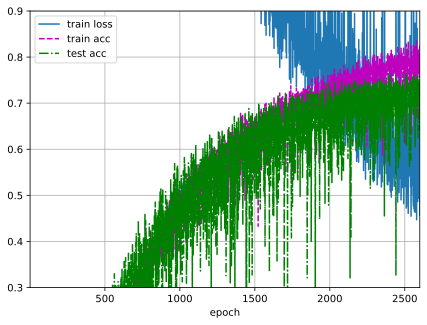

In [33]:
train_loss, train_acc, test_acc = train(net, train_iter, test_iter, loss, num_epochs, trainer)

In [38]:
print('训练损失：', train_loss)
print('训练精度：', train_acc)
print('测试集精度：', test_acc)

训练损失： 0.45704823164712816
训练精度： 0.8273809523809523
测试集精度： 0.73671875


In [42]:
def predict(net, test_iter, n=10):
    for X, y in test_iter:
        break
    trues = get_label(y)[0:n]
    preds = get_label(net(X).argmax(axis=1))[0:n]
    for i in range(n):
        print('真实标签为：', trues[i], '预测标签为：', preds[i])


In [43]:
predict(net, test_iter)

真实标签为： 下摆臂滚轮异响-GZ18010608-异常 预测标签为： 下摆臂滚轮异响-GZ18010608-异常
真实标签为： 压轮过压&下挡销与下摆臂干涉-GZ18140602-异常 预测标签为： 压轮过压&下挡销与下摆臂干涉-GZ18140602-标准
真实标签为： 下档销纵向干涉-GZ18140401-异常 预测标签为： 下档销纵向干涉-GZ18140401-异常
真实标签为： 下挡销干涉-GZ22090506-异常 预测标签为： 下挡销干涉-GZ22090506-标准
真实标签为： 压轮过压-GZ18140701-异常 预测标签为： 压轮过压-GZ18140701-异常
真实标签为： 下挡销干涉-GZ22090506-异常 预测标签为： 下挡销干涉-GZ22090506-异常
真实标签为： 下挡销横向干涉-GZ18140301-异常 预测标签为： 下挡销横向干涉-GZ18140301-标准
真实标签为： 下摆臂滚轮异响-GZ18010602-异常 预测标签为： 下摆臂滚轮异响-GZ18010602-标准
真实标签为： 辅助锁干涉-GZ18100404-标准 预测标签为： 压轮过压-GZ18140701-异常
真实标签为： 下摆臂滚轮磨损-GZ18010604-异常 预测标签为： 下摆臂滚轮磨损-GZ18010604-异常
